In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os
from os.path import join

# Setup folders and file names

In [3]:
basedir = '../../data'
ld = os.listdir(basedir)
lda = [i for i in ld if i.startswith('AXUV')]
print(lda)
fname = lda[0]

['AXUV_40416.CSV']


# Load Data with read_csv

In [4]:
colind = ['No','Date','Time','us']
colch  = [f'CH{i}' for i in range(1,17)]
colnan = [f'nan{i}' for i in range(1,32-4-15)]
columns = colind + colch + colnan

In [5]:
data = pd.read_csv(join(basedir,fname),encoding = 'cp932',skiprows = 46,names = columns)
data = data.drop(columns = colnan)
t = np.linspace(0,data.shape[0]*(data['us'][1]-data['us'][0])*1e-6,data.shape[0])
data = data.drop(columns = colind)
data.insert(0,'time',t)
# subtract mean from first 100 points
data.iloc[:,1:] = data.drop(columns='time').sub(data.drop(columns='time').iloc[:100,:].mean())
data.head()

,time,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16
0,0.00000,-0.00361,0.00052,0.00339,-0.0012,0.00161,-0.00123,-0.00123,-0.00132,-0.00151,-0.00086,-0.00226,0.00245,0.00013,0.00076,-0.00046,-0.00081
1,0.00002,0.00039,0.00052,-0.00061,-0.0002,0.00161,-0.00123,-0.00123,0.00068,0.00049,-0.00086,-0.00026,0.00145,-0.00287,-0.00024,-0.00046,0.00019
2,0.00004,0.00039,-0.00248,-0.00161,0.0008,0.00061,-0.00123,0.00077,-0.00032,-0.00051,-0.00086,0.00074,0.00045,0.00213,-0.00024,-0.00346,0.00119
3,0.00006,0.00039,-0.00248,-0.00061,-0.0002,-0.00139,-0.00023,-0.00023,-0.00032,-0.00051,-0.00286,-0.00026,-0.00255,-0.00187,-0.00024,-0.00446,0.00319
4,0.00008,0.00039,0.00052,0.00039,-0.0022,-0.00139,0.00077,-0.00123,-0.00132,-0.00151,0.00114,-0.00126,-0.00055,-0.00087,-0.00024,-0.00046,-0.00381


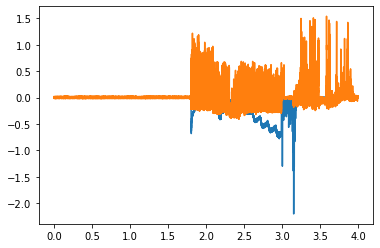

In [6]:
plot(t,data['CH1'])
plot(t,data['CH15'])
#_ = [plot(t,data[n]) for n in colch]

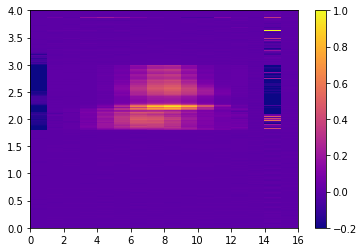

In [7]:
xy = data.drop(columns = 'time')
a = imshow(xy,extent = (0,16,0,4),cmap='plasma',origin='lower',aspect='auto',vmin=-0.2,vmax=1.)
cbar = colorbar(a)

In [8]:
#xy = data.drop(columns = 'time')
#a = contourf(xy,levels=30,extent = (0,16,0,4),cmap='plasma',origin='lower',vmin=-0.2,vmax=1.4)
#cbar = colorbar(a)

# Read settings from header

In [9]:
cols = ['No','CH','HSV','Mode','Range','Filter','Max','Min','Unit','Color','Color1','Color2','Zero']
axuv_settings = pd.read_csv(join(basedir,fname),encoding = 'cp932',skiprows=17,nrows=16,sep=',',names = cols,usecols = ['CH','Max','Min'])
axuv_settings

,CH,Max,Min
0,CH1,5.0,-5.0
1,CH2,2.5,-2.5
2,CH3,2.5,-2.5
3,CH4,2.5,-2.5
4,CH2-1,2.5,-2.5
5,CH2-2,2.5,-2.5
6,CH2-3,2.5,-2.5
7,CH2-4,2.5,-2.5
8,CH3-1,2.5,-2.5
9,CH3-2,2.5,-2.5


# TODO: 'Solve saturation'

# Get info from the header

In [10]:
with open(join(basedir,fname),'r',encoding='cp932') as f:
    for i in range(47):
        line = f.readline()
        print(i,'\t',line.strip())
        if i == 44:
            names = line.strip().split(',')
            print(len(names))
            namesch = [i for i in names if 'CH' in i]
            print(len(namesch))

0 	 ベンダ,GRAPHTEC Corporation
1 	 モデル,"GL7000"
2 	 バージョン,"Ver2.00"
3 	 MaxCH,90
4 	 LogicCH,0
5 	 PulseCH,0
6 	 MaxUnit,9
7 	 UnitOrder,HSV,HSV,HSV,HSV,HSV,HSV,HSV,HSV,HSV
8 	 UnitLP,Off,Off,Off,Off,Off,Off,Off,Off,Off
9 	 測定間隔,20us
10 	 測定点数,200000
11 	 トリガ点,0
12 	 開始時刻,2019-08-29,18:55:08
13 	 終了時刻,2019-08-29,18:56:21
14 	 トリガ時刻,2019-08-29,18:56:17
15 	 アンプ設定
16 	 CH,信号名,アンプ,入力,レンジ,フィルタ,スパン上限,スパン下限,単位,線色,,,線幅,スケーリング機能,入力側上限値,入力側下限値,出力側上限値,出力側下限値,単位
17 	 CHU1-1,"CH1",HSV,DC,10V,50KHz,+5.000,-5.000, V,28,5,6,0
18 	 CHU1-2,"CH2",HSV,DC,5V,50KHz,+2.500,-2.500, V,0,13,23,0
19 	 CHU1-3,"CH3",HSV,DC,5V,50KHz,+2.500,-2.500, V,9,22,8,0
20 	 CHU1-4,"CH4",HSV,DC,5V,50KHz,+2.500,-2.500, V,21,0,21,0
21 	 CHU2-1," CH2-1",HSV,DC,5V,50KHz,+2.500,-2.500, V,28,5,6,0
22 	 CHU2-2," CH2-2",HSV,DC,5V,50KHz,+2.500,-2.500, V,0,13,23,0
23 	 CHU2-3," CH2-3",HSV,DC,5V,50KHz,+2.500,-2.500, V,9,22,8,0
24 	 CHU2-4," CH2-4",HSV,DC,5V,50KHz,+2.500,-2.500, V,21,0,21,0
25 	 CHU3-1," CH3-1",HSV,DC,5V,50KHz,+2.500,-2.50